In [11]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from citipy import citipy
from datetime import datetime
# Import the API key.
from config import weather_api_key

In [2]:
lats = np.random.uniform(-90.000,90.000,size=1500)
lngs = np.random.uniform(-180.000,180.000,size=1500)
lat_lngs = zip(lats,lngs)

coordinates = list(lat_lngs)

In [3]:
# List for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # If city not in list, add to list
    if city not in cities:
        cities.append(city)

# Print cities length
print (len(cities))

615


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i].replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | moose factory
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | sola
Processing Record 5 of Set 1 | cockburn town
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | batagay-alyta
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | hobyo
Processing Record 13 of Set 1 | tena
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | san quintin
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 18 of Set 1 | alofi
Processing Record 19 of Set 1 | kadykchan
City not found. Skipping...
Processing Record 20 of Set 1 | lebu
Processing Re

Processing Record 36 of Set 4 | san andres
Processing Record 37 of Set 4 | andenes
Processing Record 38 of Set 4 | aflu
City not found. Skipping...
Processing Record 39 of Set 4 | aksarka
Processing Record 40 of Set 4 | cubatao
Processing Record 41 of Set 4 | tautira
Processing Record 42 of Set 4 | kaitangata
Processing Record 43 of Set 4 | chokurdakh
Processing Record 44 of Set 4 | ulaanbaatar
Processing Record 45 of Set 4 | clyde river
Processing Record 46 of Set 4 | fukue
Processing Record 47 of Set 4 | avera
Processing Record 48 of Set 4 | qabis
City not found. Skipping...
Processing Record 49 of Set 4 | nsukka
Processing Record 50 of Set 4 | leningradskiy
Processing Record 1 of Set 5 | souillac
Processing Record 2 of Set 5 | shimoda
Processing Record 3 of Set 5 | chuy
Processing Record 4 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 5 of Set 5 | eureka
Processing Record 6 of Set 5 | aripuana
Processing Record 7 of Set 5 | sao joao da barra
Processing Record 8 o

Processing Record 28 of Set 8 | zhoucheng
Processing Record 29 of Set 8 | nishihara
Processing Record 30 of Set 8 | antsohihy
Processing Record 31 of Set 8 | batagay
Processing Record 32 of Set 8 | port elizabeth
Processing Record 33 of Set 8 | brus laguna
Processing Record 34 of Set 8 | ramjibanpur
Processing Record 35 of Set 8 | pangody
Processing Record 36 of Set 8 | san martin
Processing Record 37 of Set 8 | hinton
Processing Record 38 of Set 8 | ulaangom
Processing Record 39 of Set 8 | ostrovnoy
Processing Record 40 of Set 8 | melilla
Processing Record 41 of Set 8 | san patricio
Processing Record 42 of Set 8 | ixtapa
Processing Record 43 of Set 8 | issia
Processing Record 44 of Set 8 | chapleau
Processing Record 45 of Set 8 | buala
Processing Record 46 of Set 8 | balykshi
Processing Record 47 of Set 8 | port keats
Processing Record 48 of Set 8 | weligama
Processing Record 49 of Set 8 | ambovombe
Processing Record 50 of Set 8 | banda aceh
Processing Record 1 of Set 9 | alenquer
Pro

Processing Record 16 of Set 12 | doboj
Processing Record 17 of Set 12 | bathsheba
Processing Record 18 of Set 12 | viligili
City not found. Skipping...
Processing Record 19 of Set 12 | san cristobal
Processing Record 20 of Set 12 | tomatlan
Processing Record 21 of Set 12 | port arthur
Processing Record 22 of Set 12 | vostok
Processing Record 23 of Set 12 | lhokseumawe
Processing Record 24 of Set 12 | qasigiannguit
Processing Record 25 of Set 12 | novaya zaimka
Processing Record 26 of Set 12 | lata
Processing Record 27 of Set 12 | wewak
Processing Record 28 of Set 12 | snyder
Processing Record 29 of Set 12 | vallenar
Processing Record 30 of Set 12 | hasaki
Processing Record 31 of Set 12 | haora
Processing Record 32 of Set 12 | rundu
Processing Record 33 of Set 12 | rayong
Processing Record 34 of Set 12 | nisia floresta
Processing Record 35 of Set 12 | tungor
Processing Record 36 of Set 12 | viransehir
Processing Record 37 of Set 12 | nalut
Processing Record 38 of Set 12 | yunjinghong
Ci

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Moose Factory,51.2585,-80.6094,51.80,93,90,6.91,CA,2021-08-02 05:44:17
1,Atuona,-9.8000,-139.0333,77.50,69,32,13.18,PF,2021-08-02 05:43:32
2,Sola,-13.8833,167.5500,75.92,61,77,14.05,VU,2021-08-02 05:44:17
3,Cockburn Town,21.4612,-71.1419,81.99,79,100,19.80,TC,2021-08-02 05:43:55
4,Cape Town,-33.9258,18.4232,56.10,90,0,1.99,ZA,2021-08-02 05:42:27
5,Bredasdorp,-34.5322,20.0403,55.27,94,100,6.91,ZA,2021-08-02 05:43:32
6,Batagay-Alyta,67.8006,130.4114,75.06,35,0,7.02,RU,2021-08-02 05:44:18
7,Hermanus,-34.4187,19.2345,55.80,88,76,11.16,ZA,2021-08-02 05:43:30
8,Vaini,-21.2000,-175.2000,71.76,83,40,13.80,TO,2021-08-02 05:43:59
9,Hobyo,5.3505,48.5268,81.25,65,7,23.51,SO,2021-08-02 05:44:19


In [8]:
# Next, we'll reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Moose Factory,CA,2021-08-02 05:44:17,51.2585,-80.6094,51.80,93,90,6.91
1,Atuona,PF,2021-08-02 05:43:32,-9.8000,-139.0333,77.50,69,32,13.18
2,Sola,VU,2021-08-02 05:44:17,-13.8833,167.5500,75.92,61,77,14.05
3,Cockburn Town,TC,2021-08-02 05:43:55,21.4612,-71.1419,81.99,79,100,19.80
4,Cape Town,ZA,2021-08-02 05:42:27,-33.9258,18.4232,56.10,90,0,1.99
...,...,...,...,...,...,...,...,...,...
559,Karachi,PK,2021-08-02 05:46:09,24.9056,67.0822,84.02,70,90,18.41
560,Padang,ID,2021-08-02 05:47:31,-0.9492,100.3543,86.05,75,100,5.03
561,Akyab,MM,2021-08-02 05:47:31,20.1500,92.9000,81.41,86,100,10.18
562,Pali,IN,2021-08-02 05:47:32,25.7667,73.3333,86.02,67,100,18.43


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Plotting 6.3.1
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

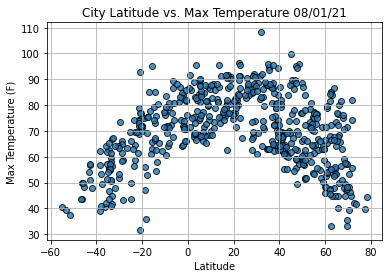

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

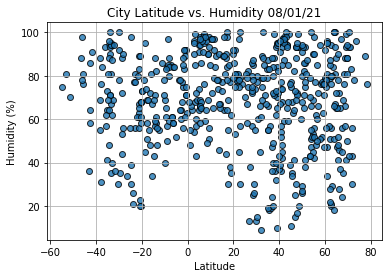

In [15]:
# 6.3.2
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

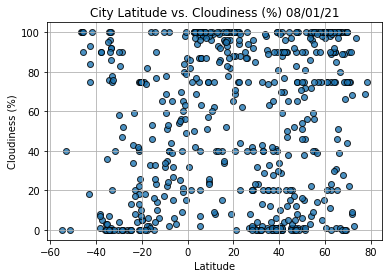

In [17]:
# 6.3.3
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()